In [2]:
import  re
import csv
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import numpy as np

#总体有多少封正常邮件，多少封垃圾邮件
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.faker import Faker
from pyecharts.render import make_snapshot
# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

In [3]:
filename = "anjuke1015.csv"
with open(filename,'r', encoding='utf-8') as f:    #
    reader = csv.reader(f)
    context = [line for line in reader]

In [4]:
with open("anjuke-m1015-1.csv", "w", encoding="utf-8", newline="")as f:
    writer = csv.writer(f)
    for line in context:
        line = [x.strip() for x in line]  # 去除每个数据项的空白符和换行符
        house_name = line[0]
        house_type = line[1]
        houseaddress = line[5].split('\n')
        house_zone = houseaddress[0].strip()
        house_zhuzhi = line[5].split('\n')[-1].split(' ')[-1].strip()
        house_address = line[5]
        price = line[2].split('元')[0]
        house_area = line[3].split('平')[0]
        house_location = line[4]
        writer.writerow([house_name, house_type, house_zone, house_zhuzhi, price, house_area, house_location])
print("数据项转换成功！")


数据项转换成功！


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('anjuke-m1015-1.csv',encoding='utf-8') # 注意这里使用utf-8

In [7]:
df.shape

(1092, 7)

In [8]:
df.duplicated().sum()  #判断是否有重复项

4

In [9]:
df.isnull().sum() #判断是否有缺失值

房源名称    0
户型      0
地址      0
地址.1    0
价格      0
面积      0
朝向      0
dtype: int64

In [10]:
df.dtypes

房源名称     object
户型       object
地址       object
地址.1     object
价格        int64
面积      float64
朝向       object
dtype: object

In [11]:
print(df['户型'].unique())

['1室0厅' '3室2厅' '2室2厅' '1室2厅' '10室2厅' '2室1厅' '1室1厅' '4室2厅' '3室1厅' '4室1厅'
 '9室3厅' '5室3厅' '5室2厅' '6室1厅' '5室1厅' '7室4厅' '10室4厅' '2室3厅' '4室3厅']


In [12]:
print(df['地址'].unique())

['紫竹苑' '伯爵花园' '培育大厦' '匀山樾' '中鑫大厦' '南州国际文华苑' '怡盛园小区' '广惠国际' '南州国际清华苑' '御庭苑'
 '尚城幸福里' '东来尚城' '城市风景' '建业大厦' '久达新村' '惠丽佳园' '丽景天城' '剑北小区' '临江大厦' '虹桥苑'
 '碧桂园滨江一号' '尚城壹品' '水岸铭门' '筑匀大厦' '云宫花城' '黔南汽车商贸城' '老年公寓小区' '中大逸峰' '海文大厦'
 '平惠小区' '华馨湾' '嘉和城市风景' '观澜水岸' '城南新家园' '嘉和园' '聚林世纪城' '明珠广场' '榕锐沸城国际'
 '马鞍山小区林馨佳苑' '东江小区' '东山学苑' '全欣大厦' '慧谷枫林' '剑峰小区' '物资大厦' '中建花园' '红叶小区'
 '华鑫大厦' '龙彩花园' '东坡花园' '利恒名苑(沸城100)' '龙山豪景' '汇悦新天地' '都市龙庭' '黔中公寓' '剑江新城'
 '康诚小区' '西苑大厦' '中寰广场' '南州国际星岸' '灵智广场' '临江雅苑' '文化小区' '都匀市河滨路州外贸宿舍' '观天下'
 '鸿安家园' '金鹏花园' '华欣大厦' '御府湾' '鼎源幸福里' '世纪广场' '静福小区' '文峰家园' '剑江半岛' '东山怡景'
 '金海岸大厦' '西鸿大厦' '剑锋小区瑞林苑' '云都广场' '都匀供电局小区' '现代城' '汇通佳苑' '水榭花都' '天源2013'
 '金麒麟' '都市银座' '尚城财富中心' '兴荣大厦' '东山上品' '水锦花城' '南州国际清华苑三期' '西城国际' '百业大厦'
 '水岸绿洲' '银湖星城' '腾龙溪苑' '西山新苑' '电信小区' '兴亚培育小区' '匀中大厦' '邮电宿舍' '飞洋华府' '西苑伊甸园'
 '中粮大厦' '中房小区' '华兴苑' '都市金座' '恒丰普罗旺斯' '市政府小区' '北部印象' '英伦国际' '173新天地'
 '沁园村小区' '协和星苑' '长江花园' '兴亚大厦' '碧云苑' '京都广场' '桃溪园' '蔬菜公司综合楼' '新华路工商银行宿舍'
 '文峰商贸城' '平桥商品房' '汽运公司宿舍' '水岸公馆' '锦江豪苑' '仙和小区' '黎筑金色城邦' '建贸大厦' '东坡经典时代'
 '锦

In [13]:
print(df['地址.1'].unique())

['剑江大道中段' '斗蓬山路12号' '培育巷1号' '剑江北路120号' '工人路6号' '大龙大道8号' '剑江北路16号'
 '平桥南路26号' '青云湖大道' '剑江中路98号' '云鹤路' '东来路' '嘉和路2号' '滨路56号' '飞燕路14号' '胜利路81号'
 '汽车商贸城对面' '剑江北路' '河滨路' '江北路172号' '西山大道' '剑江中路' '广惠路407号' '云宫路' '斗篷山路269号'
 '剑江北路139号' '文峰路1号' '新华路2号' '平桥北路4号' '伯爵美食街' '观澜路79号' '独山路' '天池路2号'
 '剑江南路181号' '剑江中路90号' '环东北路104号' '大龙大道' '剑江南路2号' '广惠路66号' '天乐路10号'
 '环东中路258号' '环东中路256号' '剑江北路38' '绿茵湖大道中段' '兰香巷' '环东中路113号' '剑江北路70号'
 '斗篷山路96号' '斗篷山路100号' '协府路10号' '振华路' '剑江南路149号' '斗篷山路28号' '环西大道6号' '斗篷山路'
 '平桥北路1号' '都匀市河滨路74-79号' '迎宾路' '环东北路108号' '广惠路270号' '广惠路438号' '绿茵湖大道'
 '七星路9号' '剑江南路' '环城西路105号' '剑江中路36号' '杜鹃湖路' '协府路28号' '剑江中路67号' '新华路161号'
 '剑江北路81号' '剑江中路112号' '民族路37号' '剑江北路72号' '环东北路74号' '斗篷山路227号' '工人路38号'
 '剑江中路91号' '剑江中路35号' '新华路26号' '广惠路47号' '环城西路36号' '外环东路' '民族路6号' '斗篷山路189号'
 '毛尖大道中段' '环城西路47号' '民族路1号' '培育巷2号' '剑江中路84号' '黔南大道' '西苑广场旁' '工人路3号'
 '平桥北路27号' '斗篷山路47号' '剑江中路71号' '天乐路' '红叶路8号' '小康路' '210国道' '剑江中路118号'
 '平桥北路2号' '平桥北路' '龙山大道171号' '新市街10号' '新华路103号' '剑江中路196号' '平桥南路' '剑江北路61号'
 '斗

In [14]:
print(df['朝向'].unique())

['南北' '朝东' '朝北' '朝西' '朝南' '东南' '西南' '东西' '西北' '东北']


In [15]:
#异常值处理
# 箱线图分析
import pyecharts.options as opts
from pyecharts.charts import Grid, Boxplot, Scatter

In [16]:
y_data = [
    df["面积"].tolist(),df["价格"].tolist()
]
#print(y_data)
scatter_data = [30, 60, 90, 120,150,180]

box_plot = Boxplot({"theme": ThemeType.MACARONS})
box_plot = (
    box_plot.add_xaxis(xaxis_data=["面积", "价格"])
    .add_yaxis(series_name="", y_axis=box_plot.prepare_data(y_data))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="center", title="建筑面积和价格尾图分析"
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter=""),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)

scatter = (
    Scatter()
    .add_xaxis(xaxis_data=["面积","价格"])
    .add_yaxis(series_name="", y_axis=scatter_data)
    
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="10%",
            pos_top="90%",
            title="",
            title_textstyle_opts=opts.TextStyleOpts(
                border_color="#999", border_width=1, font_size=14
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            axislabel_opts=opts.LabelOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
        ),
    )
)

grid = (
    Grid(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add(
        box_plot,
        grid_opts=opts.GridOpts(pos_left="10%", pos_right="10%", pos_bottom="15%"),
    )
    .add(
        scatter,
        grid_opts=opts.GridOpts(pos_left="10%", pos_right="10%", pos_bottom="15%"),
    )
)
grid.render_notebook()

上面的图不是很明白？？？

In [17]:
df.drop_duplicates(inplace=True)
df.reset_index(drop= True,inplace=True)

In [18]:
df.describe()

,价格,面积
count,1088.000000,1088.000000
mean,1381.698529,96.143199
std,971.059288,67.707114
min,260.000000,10.000000
25%,1000.000000,70.000000
50%,1300.000000,96.000000
75%,1600.000000,120.000000
max,25000.000000,1500.000000


In [19]:
#将高于房价2500元的删除
df.drop(index=df[df['价格']>2500].index,inplace=True)

In [20]:
df.drop(index=df[df['面积']>200].index,inplace=True)

In [21]:
df.to_csv('newh1.csv',encoding='utf8',index=False)

## 数据分析

In [22]:
df1 = pd.read_csv('newh1.csv',encoding='utf-8')

In [23]:
df1.describe()

,价格,面积
count,1069.000000,1069.000000
mean,1312.056127,91.257063
std,419.826927,36.423024
min,260.000000,10.000000
25%,1000.000000,69.000000
50%,1300.000000,95.000000
75%,1600.000000,120.000000
max,2500.000000,200.000000


价格区间与房源数量的关系

探究单价、数量、总价和行政区域之间的关系

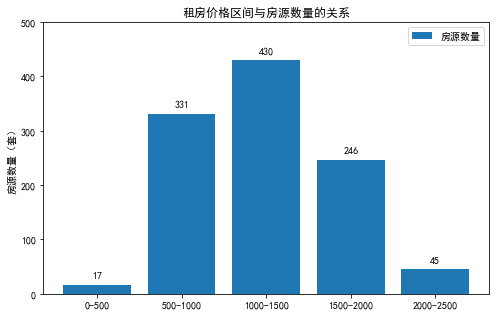

In [24]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
price_info=df1["价格"]
bins = [0,500,1000,1500,2000,2500]
labels= ["0-500",'500-1000','1000-1500','1500-2000','2000-2500']
price_stage=pd.cut(price_info,bins=bins,labels=labels).value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(price_stage.index, price_stage.values,label="房源数量")
plt.ylim(0,500)
plt.ylabel('房源数量（套）')
for a,b in zip(price_stage.index,price_stage.values):
    plt.text(a, b+10, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.legend()
plt.title("租房价格区间与房源数量的关系")
plt.show()

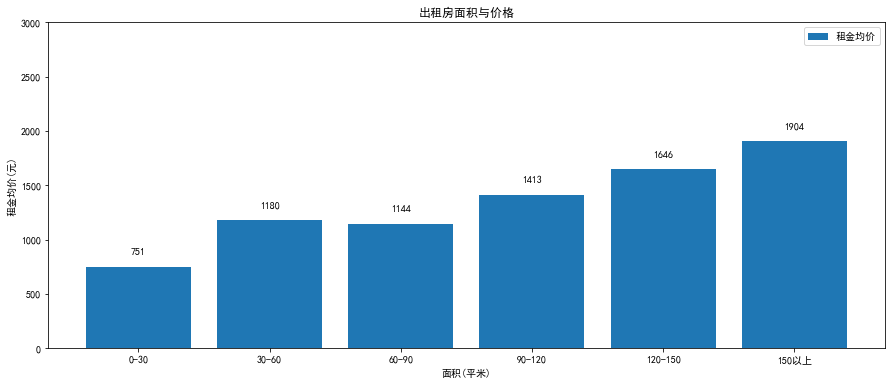

In [25]:
meters_info=df1["面积"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']

df1["户型"]=pd.cut(meters_info,bins=bins,labels=labels)
meters_data=df1[["户型","价格"]]
peices=meters_data.groupby("户型").mean().reset_index()

fig = plt.figure(figsize=(15,6))

plt.bar(peices.户型, peices.价格,label="租金均价")
plt.ylabel('租金均价(元)')
plt.ylim(0,3000)
plt.xlabel('面积(平米)')
for a,b in zip(peices.户型,peices.价格):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.legend()
###plt.title("出租房面积与价格")
plt.show()
fig.savefig('图4都匀出租房面积与租房价格.png')
plt.show()                 
fig.savefig('图4都匀出租房面积与租房价格.pdf')

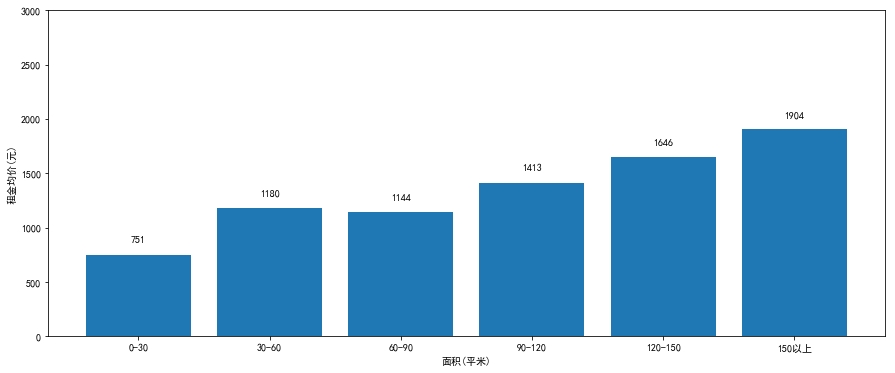

In [28]:
meters_info=df1["面积"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']

df1["户型"]=pd.cut(meters_info,bins=bins,labels=labels)
meters_data=df1[["户型","价格"]]
peices=meters_data.groupby("户型").mean().reset_index()

fig = plt.figure(figsize=(15,6))

plt.bar(peices.户型, peices.价格,label="租金均价")
plt.ylabel('租金均价(元)')
plt.ylim(0,3000)
plt.xlabel('面积(平米)')
for a,b in zip(peices.户型,peices.价格):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
###plt.legend(loc="lower left")
###plt.title("出租房面积与价格")
plt.show()
fig.savefig('图4都匀出租房面积与租房价格.png')
plt.show()                 
fig.savefig('图4都匀出租房面积与租房价格.pdf')

In [28]:
# 各区单价对比
x_data1 = []
y_data1 = []
price= round(df1.groupby(by=['地址'])['价格'].mean().sort_values(ascending=False),2).head(20).to_dict()
for key,value in  price.items():
    x_data1.append(key)
    y_data1.append(value)
print(x_data1,y_data1)

['金源大厦', '南州国际清华苑三期', '枣园小区', '水岸公馆', '南州国际清华苑', '现代城', '金澜湾', '西鸿大厦', '汇通佳苑', '白领衫大厦', '腾龙溪苑', '帝景豪园', '碧桂园滨江一号', '剑江半岛', '桃溪园', '都市金座', '华馨湾', '华欣大厦', '南州国际星岸', '龙山豪景'] [2250.0, 2075.0, 2000.0, 1950.0, 1950.0, 1885.71, 1800.0, 1800.0, 1800.0, 1800.0, 1766.67, 1760.0, 1744.74, 1738.89, 1725.0, 1725.0, 1700.0, 1685.71, 1680.0, 1677.78]


In [30]:
bar1 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data1)
    .add_yaxis("房租每月均价",y_data1,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="热门小区房租每月均价"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

bar1.render_notebook()

In [31]:
bar1 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data1)
    .add_yaxis("租金",y_data1,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个小区租房价格"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=10)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

bar1.render_notebook()

In [32]:
# 各区单价对比
x_data1 = []
y_data1 = []
price= round(df1.groupby(by=['地址'])['价格'].mean().sort_values(ascending=False),2).head(20).to_dict()
for key,value in  price.items():
    x_data1.append(key)
    y_data1.append(value)
print(x_data1,y_data1)

['金源大厦', '南州国际清华苑三期', '枣园小区', '水岸公馆', '南州国际清华苑', '现代城', '金澜湾', '西鸿大厦', '汇通佳苑', '白领衫大厦', '腾龙溪苑', '帝景豪园', '碧桂园滨江一号', '剑江半岛', '桃溪园', '都市金座', '华馨湾', '华欣大厦', '南州国际星岸', '龙山豪景'] [2250.0, 2075.0, 2000.0, 1950.0, 1950.0, 1885.71, 1800.0, 1800.0, 1800.0, 1800.0, 1766.67, 1760.0, 1744.74, 1738.89, 1725.0, 1725.0, 1700.0, 1685.71, 1680.0, 1677.78]


In [33]:
bar1 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data1)
    .add_yaxis("租金",y_data1,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset:1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="租金排名前二十小区"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

bar1.render_notebook()

In [34]:
# 各区单价对比
x_data1 = []
y_data1 = []
price= round(df1.groupby(by=['地址'])['价格'].mean().sort_values(ascending=True),2).head(20).to_dict()
for key,value in  price.items():
    x_data1.append(key)
    y_data1.append(value)
print(x_data1,y_data1)

['机床厂宿舍', '市政府小区', '鹏达大厦', '环东南路127号25栋住宅楼', '江城', '红旗新村', '州林业大厦', '振华红星小区', '一零四地质队宿舍', '三和大厦', '福鑫园', '邮电宿舍', '开发区纬三路康联小区', '八一小区', '公交馨苑', '剑北小区', '都匀市河滨路州外贸宿舍', '市医院宿舍', '仙和小区', '静福小区'] [500.0, 500.0, 500.0, 600.0, 625.0, 650.0, 650.0, 675.0, 700.0, 700.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0]


In [35]:
bar1 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data1)
    .add_yaxis("房价",y_data1,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个地区单价"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

bar1.render_notebook()

In [36]:
# 各区房子数量对比
x_data3 = []
y_data3 = []
all_number= round(df1.groupby(by=['地址']).size().sort_values(ascending=False),2).head(20).to_dict()
for key,value in  all_number.items():
    x_data3.append(key)
    y_data3.append(value)
print(x_data3,y_data3)

['伯爵花园', '马鞍山小区林馨佳苑', '水岸铭门', '中鑫大厦', '平惠小区', '碧桂园滨江一号', '黔中公寓', '尚城壹品', '御庭苑', '城市风景', '南州国际文华苑', '中大逸峰', '恒丰普罗旺斯', '尚城幸福里', '文峰家园', '临江大厦', '金海岸大厦', '紫竹苑', '利恒名苑(沸城100)', '汇悦新天地'] [72, 34, 26, 20, 20, 19, 19, 18, 15, 15, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12]


In [37]:
bar3 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data3)
    .add_yaxis("数量",y_data3,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个地区房子数量"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

bar3.render_notebook()

In [38]:
#探究面积和价格的关系
print(df1["面积"],df1["价格"])
c = (
    Scatter({"theme": ThemeType.MACARONS})
    .add_xaxis(df["面积"])
    .add_yaxis("", df["价格"])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="面积-租金"),
        visualmap_opts=opts.VisualMapOpts(max_=200),
    )
)
c.render_notebook()

0        30.0
1       127.0
2       130.0
3        75.0
4       140.0
5        90.0
6       138.0
7        60.0
8       114.0
9       100.0
10       80.0
11      110.0
12       51.0
13       51.0
14       46.0
15      120.0
16      110.0
17       90.0
18       80.0
19       75.0
20       90.0
21       80.0
22       50.0
23      120.0
24       93.0
25       53.0
26       80.0
27      105.0
28      110.0
29      110.0
        ...  
1039    109.0
1040     40.0
1041    137.0
1042     30.0
1043     35.0
1044    121.0
1045     18.0
1046     12.0
1047     10.0
1048     97.0
1049     45.0
1050     60.0
1051     60.0
1052     30.0
1053     18.0
1054    148.0
1055     45.0
1056     85.3
1057    104.0
1058    136.0
1059     60.0
1060     78.8
1061     90.0
1062     18.0
1063    120.0
1064     99.0
1065     18.0
1066     96.0
1067     79.0
1068    120.0
Name: 面积, Length: 1069, dtype: float64 0        800
1        800
2       1400
3       1500
4       1500
5       1300
6       1500
7       1500
8  

In [39]:
#探究朝向和价格的关系
linex_data1 = ['南北', '朝东', '朝北', '朝西', '朝南', '东南', '西南', '东西', '西北', '东北']
liney_data1 = []
my_order = df1.groupby(by=["朝向"])["价格"].median().sort_values(ascending=False).to_dict()
print(my_order)
for key in  linex_data1:
    liney_data1.append(my_order[key])

print(liney_data1)

{'西南': 1600, '东北': 1600, '朝南': 1400, '朝北': 1300, '朝东': 1300, '南北': 1300, '东南': 1300, '朝西': 1150, '东西': 1125, '西北': 1075}
[1300, 1300, 1300, 1150, 1400, 1300, 1600, 1125, 1075, 1600]


In [40]:
line = (
    Line()
    .add_xaxis(linex_data1)
    .add_yaxis("", liney_data1, is_connect_nones=True,is_smooth=True)
    .set_global_opts(title_opts=opts.TitleOpts(title="朝向和价格的关系"))
)

c1 = (
    Radar({"theme": ThemeType.MACARONS})
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="南北", max_=1800),
            opts.RadarIndicatorItem(name="朝东", max_=1800),
            opts.RadarIndicatorItem(name="朝北", max_=1800),
            opts.RadarIndicatorItem(name="朝西", max_=1800),
            opts.RadarIndicatorItem(name="朝南", max_=1800),
            opts.RadarIndicatorItem(name="东南", max_=1800),
            opts.RadarIndicatorItem(name="西南", max_=1800),
            opts.RadarIndicatorItem(name="东西", max_=1800),
            opts.RadarIndicatorItem(name="西北", max_=1800),
            opts.RadarIndicatorItem(name="东北", max_=1800),
            
        ]
    )
    .add("", [liney_data1])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        legend_opts=opts.LegendOpts(selected_mode="single"),
        title_opts=opts.TitleOpts(title="朝向和价格的关系"),
    )
)

c1.render_notebook()

In [41]:
#户型和价格的关系
my_order = df1.groupby(by=["户型"])["价格"].median().sort_values()
print(my_order)
x_data8 = my_order.index.tolist()
y_data8 = my_order.tolist()
print(x_data8,y_data8)

户型
0-30        750
60-90      1100
30-60      1200
90-120     1400
120-150    1600
150以上      2000
Name: 价格, dtype: int64
['0-30', '60-90', '30-60', '90-120', '120-150', '150以上'] [750, 1100, 1200, 1400, 1600, 2000]


In [43]:
c_d3 = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x_data8)
    .add_yaxis("", y_data8,
        itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(1, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])""")))
  
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(
        title_opts={"text": "户型与租房价格的关系", "subtext": ""}
    )
)
c_d3.render_notebook()

In [44]:
order = df1['户型'].value_counts(ascending=False).head(8)
print(order)
x_data9 = order.index.tolist()
y_data9 = order.tolist()
print(x_data9,y_data9)

90-120     339
60-90      263
120-150    200
30-60      147
0-30        94
150以上       26
Name: 户型, dtype: int64
['90-120', '60-90', '120-150', '30-60', '0-30', '150以上'] [339, 263, 200, 147, 94, 26]


In [45]:
background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)

line = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=x_data9)
    .add_yaxis(
        series_name="户型",
        y_axis=y_data9,
        is_smooth=True,
        is_symbol_show=True,
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#fff"),
        label_opts=opts.LabelOpts(is_show=True, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(
            color="red", border_color="#fff", border_width=3
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
        areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="户型",
            pos_top="5%",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=16),
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=False,
            axislabel_opts=opts.LabelOpts(rotate=15, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=2,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            position="right",
            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
            ),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=15,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)
line.render_notebook()

### 六、模型建立

In [ ]:
data_copy = df1.copy()   #复制数据
print(data_copy[['户型','面积']].head())

In [ ]:
data_copy[['室','厅']]=data_copy['户型'].str.extract('(\d+)室(\d+)厅')
data_copy['室'] = data_copy['室'].astype(float)
data_copy['厅'] = data_copy['厅'].astype(float)
data_copy[['室','厅']].head()

In [ ]:
data_copy

In [ ]:
del data_copy['房源名称']
del data_copy['户型']
del data_copy['地址']
del data_copy['地址.1']


In [ ]:
data_copy

In [ ]:
map1 = {'朝南':5, '南北':6, '朝北':1, '西南':10, '东西':4, '朝东':2, '东北':8, '东南':9, '朝西':3, '西北':7}
data_copy['朝向'] = data_copy['朝向'].map(map1)

In [ ]:
data_copy

In [ ]:
data_copy.to_csv('data1.csv',encoding='gbk',index=False)

In [ ]:
X =data_copy.drop(columns=['价格'])
y = data_copy['价格']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=33)
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(X_train.values)
x_test = poly.fit_transform(X_test)
print(X,y)

## 七、模型预测

In [ ]:
 # 线性回归
la = Lasso(alpha=0.1,max_iter=100000)
la.fit(x_train,y_train)
print("0.1")
print(f'训练集得分：{round(la.score(x_train,y_train),2)}')
print(f'测试集得分：{round(la.score(x_test,y_test),2)}')
print ("使用的特性数量:{}".format(np.sum(la.coef_!=0)))
print("0.01")
la1 = Lasso(alpha=0.01,max_iter=100000)
la1.fit(x_train,y_train)
print(f'训练集得分：{round(la1.score(x_train,y_train),2)}')
print(f'测试集得分：{round(la1.score(x_test,y_test),2)}')
print ("使用的特性数量:{}".format(np.sum(la1.coef_!=0)))

In [ ]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题


def linearRegression(alpha=0.01,num_iters=400):
    print(u"加载数据...\n")
    
    data = loadtxtAndcsv_data("data1.txt","        ",np.float64)  #读取数据
    X = data[:,0:-1]      # X对应0到倒数第2列                  
    y = data[:,-1]        # y对应最后一列  
    m = len(y)            # 总的数据条数
    col = data.shape[1]      # data的列数
    
    X,mu,sigma = featureNormaliza(X)    # 归一化
    plot_X1_X2(X)         # 画图看一下归一化效果
    
    X = np.hstack((np.ones((m,1)),X))    # 在X前加一列1
    
    print(u"\n执行梯度下降算法....\n")
    
    theta = np.zeros((col,1))
    y = y.reshape(-1,1)   #将行向量转化为列
    theta,J_history = gradientDescent(X, y, theta, alpha, num_iters)
    
    plotJ(J_history, num_iters)
    
    return mu,sigma,theta   #返回均值mu,标准差sigma,和学习的结果theta
    
   
    # 加载txt和csv文件
def loadtxtAndcsv_data(fileName,split,dataType):
    return np.loadtxt(fileName,delimiter=split,dtype=dataType)

# # 加载npy文件
# def loadnpy_data(fileName):
#     return np.load(fileName)

# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化
    
    return X_norm,mu,sigma

# 画二维图
def plot_X1_X2(X):
    plt.scatter(X[:,0],X[:,1])
    plt.show()


# 梯度下降算法
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)      
    n = len(theta)
    temp = np.matrix(np.zeros((n,num_iters)))   # 暂存每次迭代计算的theta，转化为矩阵形式
    J_history = np.zeros((num_iters,1)) #记录每次迭代计算的代价值
    for i in range(num_iters):  # 遍历迭代次数    
        h = np.dot(X,theta)     # 计算内积，matrix可以直接乘
        temp[:,i] = theta - ((alpha/m)*(np.dot(np.transpose(X),h-y)))   #梯度的计算
        theta = temp[:,i]
        J_history[i] = computerCost(X,y,theta)      #调用计算代价函数
        print('.', end=' ')      
    return theta,J_history  

# 计算代价函数
def computerCost(X,y,theta):
    m = len(y)
    J = 0
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m) #计算代价J
    return J

# 画每次迭代代价的变化图
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel(u"迭代次数",fontproperties=font) # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"代价值",fontproperties=font)
    plt.title(u"代价随迭代次数的变化",fontproperties=font)
    plt.show()

# 测试linearRegression函数
def testLinearRegression():
    mu,sigma,theta = linearRegression(0.01,400)
    print("\n计算的theta值为：\n",theta)
    print(u"\n预测结果为：\n",predict(mu, sigma, theta))
    
# 测试学习效果（预测）
def predict(mu,sigma,theta):
    result = 0
    # 注意归一化
    predict = np.array([105,10,4,0,5,4,4,5,6,1,3,1,1,10])
    norm_predict = (predict-mu)/sigma
    final_predict = np.hstack((np.ones((1)),norm_predict))
    result = np.dot(final_predict,theta)    # 预测结果
    return result
    
    
if __name__ == "__main__":
    testLinearRegression()

In [ ]:
# 随机森林

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(f'训练集得分：{round(rf.score(x_train,y_train),2)}')
print(f'测试集得分：{round(rf.score(x_test,y_test),2)}')

In [ ]:
# 决策树
dt = DecisionTreeRegressor(max_depth = 6)
y_pred_dt=dt.fit(x_train,y_train)
print(f'训练集得分：{round(dt.score(x_train,y_train),2)}')
print(f'测试集得分：{round(dt.score(x_test,y_test),2)}')

In [ ]:
# k近邻

kn = KNeighborsRegressor(n_neighbors=20)
kn.fit(x_train,y_train)
print(f'训练集得分：{round(kn.score(x_train,y_train),2)}')
print(f'测试集得分：{round(kn.score(x_test,y_test),2)}')

In [ ]:
apply = np.array([105,5,3,1]).reshape(1,-1)
poly_apply = poly.fit_transform(apply)
print('------------总价预测结果-------------')
print(f'线性回归：{round(la.predict(poly_apply)[0],2)}万元')
print(f'随机森林回归：{round(rf.predict(poly_apply)[0],2)}万元')
print(f'决策树回归：{round(dt.predict(poly_apply)[0],2)}万元')
print(f'K近邻回归：{round(kn.predict(poly_apply)[0],2)}万元')
#print(f'自己手写线性回归：{round(132.20345643,2)}万元')
print('------------综合预测结果-------------')
print(round(((la.predict(poly_apply)+rf.predict(poly_apply)+dt.predict(poly_apply)+kn.predict(poly_apply))/4.0)[0],2),'元')